# EECS 731 Final Project - Clothing One
## Feature Engineering

In [1]:
import pandas as pd
from sklearn import preprocessing
import pickle

In [2]:
# Reducing Data Size to be able to upload the initial data
# df = pd.read_json('../Data/renttherunway_final_data.json', lines=True)
# df.to_pickle("../Data/renttherunway_final_data.pkl")

In [3]:
df = pickle.load(open("../Data/renttherunway_final_data.pkl", "rb"))
df = df.drop(['review_summary', 'review_text'], axis=1)
df = df.dropna()
df.index = df.reset_index().index
df['review_date'] = pd.to_datetime(df['review_date'])

df.head()

,age,body type,bust size,category,fit,height,item_id,rating,rented for,review_date,size,user_id,weight
0,28.0,hourglass,34d,romper,fit,"5' 8""",2260466,10.0,vacation,2016-04-20,14,420272,137lbs
1,36.0,straight & narrow,34b,gown,fit,"5' 6""",153475,10.0,other,2013-06-18,12,273551,132lbs
2,34.0,pear,34c,dress,fit,"5' 5""",126335,8.0,formal affair,2014-02-12,8,909926,135lbs
3,27.0,athletic,34b,gown,fit,"5' 9""",616682,10.0,wedding,2016-09-26,12,151944,145lbs
4,45.0,athletic,32b,dress,fit,"5' 8""",364092,8.0,date,2016-04-30,8,734848,138lbs


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146381 entries, 0 to 146380
Data columns (total 13 columns):
age            146381 non-null float64
body type      146381 non-null object
bust size      146381 non-null object
category       146381 non-null object
fit            146381 non-null object
height         146381 non-null object
item_id        146381 non-null int64
rating         146381 non-null float64
rented for     146381 non-null object
review_date    146381 non-null datetime64[ns]
size           146381 non-null int64
user_id        146381 non-null int64
weight         146381 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 14.5+ MB


In [5]:
def parse_ht(ht):
    # format: 7' 0.0"
    ht_ = ht.split("' ")
    ft_ = float(ht_[0])
    in_ = float(ht_[1].replace("\"",""))
    return (12*ft_) + in_

df['height'] = df['height'].apply(lambda x: parse_ht(x))

In [6]:
df['weight'] = df['weight'].replace('[lbs]', '', regex=True).astype(int)
df.head()

,age,body type,bust size,category,fit,height,item_id,rating,rented for,review_date,size,user_id,weight
0,28.0,hourglass,34d,romper,fit,68.0,2260466,10.0,vacation,2016-04-20,14,420272,137
1,36.0,straight & narrow,34b,gown,fit,66.0,153475,10.0,other,2013-06-18,12,273551,132
2,34.0,pear,34c,dress,fit,65.0,126335,8.0,formal affair,2014-02-12,8,909926,135
3,27.0,athletic,34b,gown,fit,69.0,616682,10.0,wedding,2016-09-26,12,151944,145
4,45.0,athletic,32b,dress,fit,68.0,364092,8.0,date,2016-04-30,8,734848,138


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146381 entries, 0 to 146380
Data columns (total 13 columns):
age            146381 non-null float64
body type      146381 non-null object
bust size      146381 non-null object
category       146381 non-null object
fit            146381 non-null object
height         146381 non-null float64
item_id        146381 non-null int64
rating         146381 non-null float64
rented for     146381 non-null object
review_date    146381 non-null datetime64[ns]
size           146381 non-null int64
user_id        146381 non-null int64
weight         146381 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(4), object(5)
memory usage: 14.5+ MB


In [8]:
df['age'] = df['age'].astype(int)

In [9]:
df.head()

,age,body type,bust size,category,fit,height,item_id,rating,rented for,review_date,size,user_id,weight
0,28,hourglass,34d,romper,fit,68.0,2260466,10.0,vacation,2016-04-20,14,420272,137
1,36,straight & narrow,34b,gown,fit,66.0,153475,10.0,other,2013-06-18,12,273551,132
2,34,pear,34c,dress,fit,65.0,126335,8.0,formal affair,2014-02-12,8,909926,135
3,27,athletic,34b,gown,fit,69.0,616682,10.0,wedding,2016-09-26,12,151944,145
4,45,athletic,32b,dress,fit,68.0,364092,8.0,date,2016-04-30,8,734848,138


In [10]:
le_rented_for = preprocessing.LabelEncoder()
df['rented for']  = le_rented_for.fit_transform(df['rented for'])
le_rented_for_mapping = dict(zip(le_rented_for.classes_, le_rented_for.transform(le_rented_for.classes_)))
rented_for_encoding = pd.DataFrame.from_dict(le_rented_for_mapping, orient='index').rename(columns={0: 'encoding'})
rented_for_encoding.index.name = 'labels'
rented_for_encoding

,encoding
labels,
date,0
everyday,1
formal affair,2
other,3
party,4
party: cocktail,5
vacation,6
wedding,7
work,8


In [11]:
le_category = preprocessing.LabelEncoder()
df['category']  = le_category.fit_transform(df['category'])
le_category_mapping = dict(zip(le_category.classes_, le_category.transform(le_category.classes_)))
category_encoding = pd.DataFrame.from_dict(le_category_mapping, orient='index').rename(columns={0: 'encoding'})
category_encoding.index.name = 'labels'
category_encoding

,encoding
labels,
ballgown,0
blazer,1
blouse,2
blouson,3
bomber,4
...,...
trouser,63
trousers,64
tunic,65


In [12]:
le_body_type = preprocessing.LabelEncoder()
df['body type']  = le_body_type.fit_transform(df['body type'])
le_body_type_mapping = dict(zip(le_body_type.classes_, le_body_type.transform(le_body_type.classes_)))
body_type_encoding = pd.DataFrame.from_dict(le_body_type_mapping, orient='index').rename(columns={0: 'encoding'})
body_type_encoding.index.name = 'labels'
body_type_encoding

,encoding
labels,
apple,0
athletic,1
full bust,2
hourglass,3
pear,4
petite,5
straight & narrow,6


In [13]:
df.head()

,age,body type,bust size,category,fit,height,item_id,rating,rented for,review_date,size,user_id,weight
0,28,3,34d,44,fit,68.0,2260466,10.0,6,2016-04-20,14,420272,137
1,36,6,34b,20,fit,66.0,153475,10.0,3,2013-06-18,12,273551,132
2,34,4,34c,16,fit,65.0,126335,8.0,2,2014-02-12,8,909926,135
3,27,1,34b,20,fit,69.0,616682,10.0,7,2016-09-26,12,151944,145
4,45,1,32b,16,fit,68.0,364092,8.0,0,2016-04-30,8,734848,138


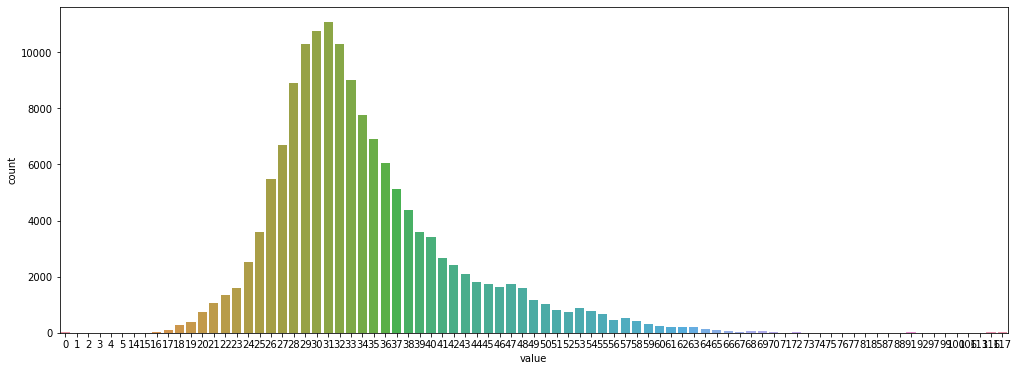

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.figure(figsize=(17, 6))
sns.countplot(x="value", data=pd.melt(pd.DataFrame(df.age)))
plt.show()

In [15]:
bra = pd.read_csv('../Data/bra_sizes.csv', index_col=[0])

In [16]:
bra.head()

,volume (cc),in
name,,
28aa,90,0
30aa,130,0
32aa,180,0
34aa,240,0
36aa,310,0


In [17]:
df['bust size'] = df['bust size'].replace(to_replace ='d\+', value = 'e', regex = True)
df['bust size'] = df['bust size'].replace(to_replace ='ddd/e', value = 'ddd', regex = True)

df['bust_volume'] = df['bust size'].apply(lambda s : bra['volume (cc)'][s])
df['chest_diff'] = df['bust size'].apply(lambda s : bra['in'][s])
df = df.drop('bust size', axis=1)

df.rename(columns={'rented for':'rented_for',
                   'body type':'body_type'}, inplace=True)
df.rating = df.rating.astype(int)
df.head()

SyntaxError: invalid syntax (<ipython-input-17-04382e88a59b>, line 6)

In [ ]:
import pickle
pickle.dump(df, open( "../Data/reviews.pkl", "wb" ) )

In [ ]:
df_import = pickle.load( open( "../Data/reviews.pkl", "rb" ) )
df.head()

In [ ]:
pickle.dump(body_type_encoding, open( "../Data/body_type_encoding.pkl", "wb" ))
pickle.dump(category_encoding, open( "../Data/category_encoding.pkl", "wb" ))
pickle.dump(rented_for_encoding, open( "../Data/rented_for_encoding.pkl", "wb" ))

In [ ]:
rented_import = pickle.load( open( "../Data/rented_for_encoding.pkl", "rb" ) )
rented_import